<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Deep Learning</b></font></h1> 
<a href="mailto:rogerio.oliveira@mackenzie.br">Rogério de Oliveira</a><br>

<br>
<br>

---


<h1 align=left><font size = 6, style="color:rgb(200,0,0)">MLP com TensorFlow</font></h1>
<hr>

# **IMPORTANTE:** Antes de começar 

Execute a célula final desse Lab. Ela irá **inicializar** o seu ambiente com rotinas que são empregadas aqui.

# Código completo

Aqui o código completo em uma única célula.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, layers
import tensorflow as tf

In [2]:
def mlp_plot(hot=1, norm=1, layers_qty=3, n=10, act='sigmoid', get_date=0):
    fraud = pd.read_csv("http://meusite.mackenzie.br/rogerio/ML/qconlondon2016_sample_data.csv")
    if (get_date):
        fraud['day'] = fraud['charge_time'].str.slice(8,10).astype(int)
        fraud['month'] = fraud['charge_time'].str.slice(5,7).astype(int)
        
    fraud.drop(columns=['charge_time'],inplace=True)
    
    X = fraud.drop(columns=['fraudulent'])
    
    if (hot):
        ## Hot Encode
        X_number = X.select_dtypes(include='number')
        X_categorical = X.select_dtypes(exclude='number')

        dummies = [pd.get_dummies(X[c],prefix=c, prefix_sep='_') for c in X_categorical.columns]
        X_dummies = pd.concat(dummies, axis=1)

        X = pd.concat([X_number,X_dummies], axis=1)
        X.head()
    else:
        ## Label Encode
        from sklearn.preprocessing import LabelEncoder
        labelencoder = LabelEncoder()
        X['card_country_label'] = labelencoder.fit_transform(X['card_country'])
        X = X.drop(columns=['card_country'])
    if (norm):
        ## Normalize
        from sklearn.preprocessing import scale
        X_norm = scale(X)
        X_norm
    else:
        ## Without normalization
        X_norm = X
        X_norm

    ## Preparando a saída `y` 

    fraud.fraudulent = fraud.fraudulent.replace(True,1)
    fraud.fraudulent = fraud.fraudulent.replace(False,0)

    y_num = fraud.fraudulent
    y_num

    ## Separando os dados de Treinamento e Teste 

    seed = 1234
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y_num, test_size=0.3, stratify=y_num, random_state=seed)

    ## Adequando categorical(y_train) para o `Keras`

    from keras.utils import to_categorical

    y_train = to_categorical(y_train)
    y_train

    ## Configuração da Rede DeepLearning

    model = Sequential([layers.Dense(X.shape[1], activation='sigmoid', input_shape=[X.shape[1],])])
    for i in range(layers_qty):
        model.add(layers.Dense(n, activation=act))
#   model.add(layers.Dense(8, activation='sigmoid'))

    model.add(layers.Dense(2, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    ## Treinamento da Rede DeepLearning

    history = model.fit(X_train, y_train, validation_split=0.2, epochs=20)

    ## Avaliação do Treinamento

    loss, val_loss, acc, val_acc = plot_loss_acc(history,'Two Hidden Layer Neural Network 5,8,8,2 (sigmoid)')

    ## Predição, aplicando e avaliando o modelo

    y_pred = np.argmax(model.predict(X_test), axis=-1)

    print(y_pred)
    print(confusion_matrix(y_pred,y_test))

    print(classification_report(y_pred,y_test))
    
    print(y_test)

# Exercício. 
Execute o modelo acima sem normalização dos dados. O modelo é sensível a normalização? 

Epoch 1/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6929 - accuracy: 0.5098 - val_loss: 0.6721 - val_accuracy: 0.6503
Epoch 2/20
1565/1565 [==============================] - 2s 2ms/step - loss: 0.6489 - accuracy: 0.6456 - val_loss: 0.6160 - val_accuracy: 0.6719
Epoch 3/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6165 - accuracy: 0.6715 - val_loss: 0.6159 - val_accuracy: 0.6735
Epoch 4/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6179 - accuracy: 0.6691 - val_loss: 0.6094 - val_accuracy: 0.6766
Epoch 5/20
1565/1565 [==============================] - 2s 2ms/step - loss: 0.6143 - accuracy: 0.6701 - val_loss: 0.6092 - val_accuracy: 0.6744
Epoch 6/20
1565/1565 [==============================] - 2s 2ms/step - loss: 0.6143 - accuracy: 0.6711 - val_loss: 0.6093 - val_accuracy: 0.6732
Epoch 7/20
1565/1565 [==============================] - 2s 2ms/step - loss: 0.6110 - accuracy: 0.6724 - val_loss: 0.6092 - val_accuracy:

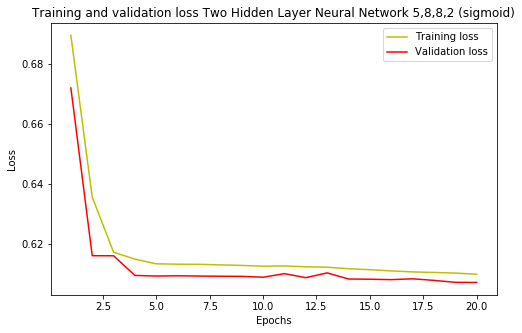

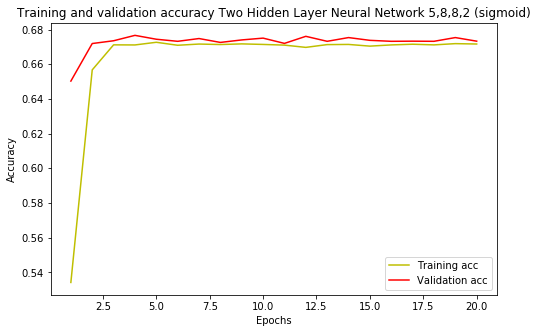

Two Hidden Layer Neural Network 5,8,8,2 (sigmoid)Accuracy Train: 67.16 %, Accuracy Test: 67.33 %
[0 0 0 ... 0 0 0]
[[10544  5823]
 [ 3008  7443]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.70     16367
           1       0.56      0.71      0.63     10451

    accuracy                           0.67     26818
   macro avg       0.67      0.68      0.67     26818
weighted avg       0.69      0.67      0.67     26818

9484     0.0
74480    1.0
9602     0.0
956      0.0
52324    1.0
        ... 
47854    1.0
30665    0.0
24197    0.0
5977     0.0
3248     0.0
Name: fraudulent, Length: 26818, dtype: float64


In [5]:
mlp_plot()

Epoch 1/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6960 - accuracy: 0.5010 - val_loss: 0.6954 - val_accuracy: 0.5027
Epoch 2/20
1565/1565 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.5041 - val_loss: 0.6927 - val_accuracy: 0.5027
Epoch 3/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6927 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.5057
Epoch 4/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6925 - accuracy: 0.5059 - val_loss: 0.6918 - val_accuracy: 0.5068
Epoch 5/20
1565/1565 [==============================] - 2s 2ms/step - loss: 0.6918 - accuracy: 0.5060 - val_loss: 0.6901 - val_accuracy: 0.5412
Epoch 6/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6913 - accuracy: 0.5082 - val_loss: 0.6906 - val_accuracy: 0.5027
Epoch 7/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6899 - accuracy: 0.5015 - val_loss: 0.6905 - val_accuracy:

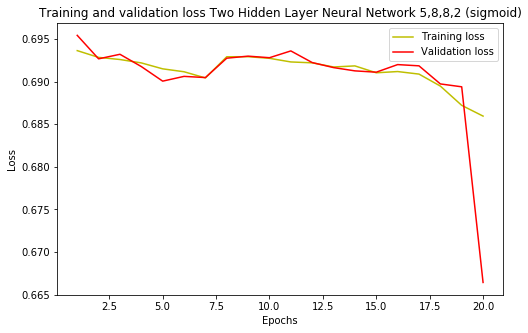

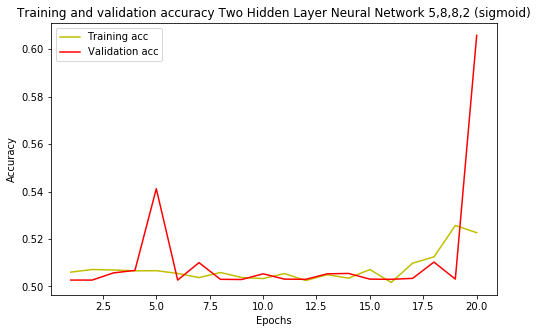

Two Hidden Layer Neural Network 5,8,8,2 (sigmoid)Accuracy Train: 52.27 %, Accuracy Test: 60.58 %
[0 0 0 ... 0 0 0]
[[12168  9030]
 [ 1384  4236]]
              precision    recall  f1-score   support

           0       0.90      0.57      0.70     21198
           1       0.32      0.75      0.45      5620

    accuracy                           0.61     26818
   macro avg       0.61      0.66      0.57     26818
weighted avg       0.78      0.61      0.65     26818



In [65]:
mlp_plot(norm=0)

O modelo fica pior: 

C/ Normalização: Accuracy = +- 67%

S/ Normalização: Accuracy +- 51%


# Exercício. 
Execute o modelo agora empregando *label encode* do atributo `card_country`.

Epoch 1/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.7022 - accuracy: 0.5087 - val_loss: 0.6789 - val_accuracy: 0.5779
Epoch 2/20
1565/1565 [==============================] - 2s 2ms/step - loss: 0.6546 - accuracy: 0.6375 - val_loss: 0.6177 - val_accuracy: 0.6653
Epoch 3/20
1565/1565 [==============================] - 2s 2ms/step - loss: 0.6203 - accuracy: 0.6674 - val_loss: 0.6122 - val_accuracy: 0.6761
Epoch 4/20
1565/1565 [==============================] - 2s 2ms/step - loss: 0.6151 - accuracy: 0.6720 - val_loss: 0.6114 - val_accuracy: 0.6749
Epoch 5/20
1565/1565 [==============================] - 2s 2ms/step - loss: 0.6147 - accuracy: 0.6719 - val_loss: 0.6109 - val_accuracy: 0.6719
Epoch 6/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6140 - accuracy: 0.6726 - val_loss: 0.6100 - val_accuracy: 0.6723
Epoch 7/20
1565/1565 [==============================] - 2s 2ms/step - loss: 0.6154 - accuracy: 0.6700 - val_loss: 0.6094 - val_accuracy:

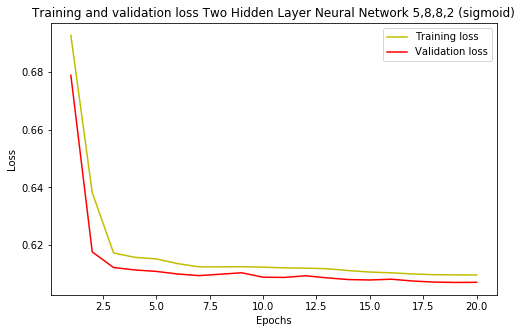

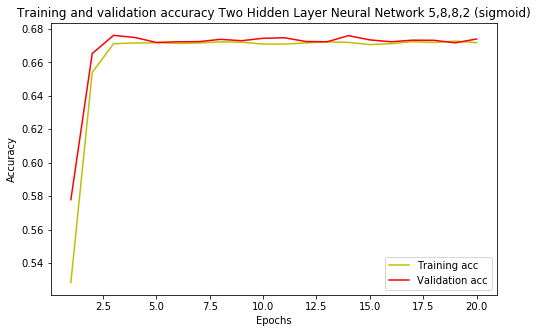

Two Hidden Layer Neural Network 5,8,8,2 (sigmoid)Accuracy Train: 67.18 %, Accuracy Test: 67.40 %
[0 0 0 ... 0 0 0]
[[10714  5973]
 [ 2838  7293]]
              precision    recall  f1-score   support

           0       0.79      0.64      0.71     16687
           1       0.55      0.72      0.62     10131

    accuracy                           0.67     26818
   macro avg       0.67      0.68      0.67     26818
weighted avg       0.70      0.67      0.68     26818



In [68]:
# Com o hot encoding desativado (hot=0), a função faz o label encoding
mlp_plot(hot=0)

# Exercício. 
Agora varie parâmetros da rede neural, como número de camadas, número de neurônios e função de ativação. Veja se consegue obter um resultado significativamente melhor que os anteriores.

Epoch 1/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6465 - accuracy: 0.6171 - val_loss: 0.6087 - val_accuracy: 0.6717
Epoch 2/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6110 - accuracy: 0.6729 - val_loss: 0.6101 - val_accuracy: 0.6726
Epoch 3/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6110 - accuracy: 0.6684 - val_loss: 0.6069 - val_accuracy: 0.6760
Epoch 4/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6109 - accuracy: 0.6720 - val_loss: 0.6099 - val_accuracy: 0.6717
Epoch 5/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6105 - accuracy: 0.6711 - val_loss: 0.6143 - val_accuracy: 0.6686
Epoch 6/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6088 - accuracy: 0.6744 - val_loss: 0.6081 - val_accuracy: 0.6724
Epoch 7/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6117 - accuracy: 0.6660 - val_loss: 0.6104 - val_accuracy:

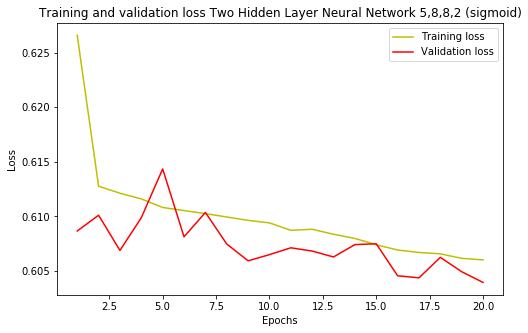

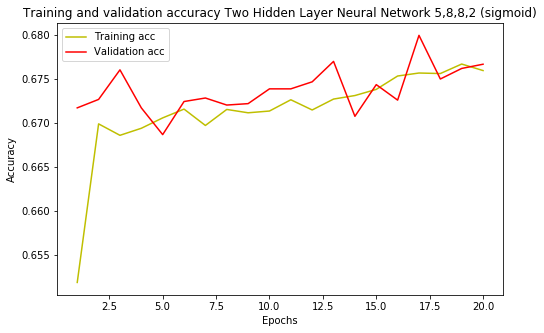

Two Hidden Layer Neural Network 5,8,8,2 (sigmoid)Accuracy Train: 67.59 %, Accuracy Test: 67.66 %
[0 0 0 ... 0 0 0]
[[10578  5694]
 [ 2974  7572]]
              precision    recall  f1-score   support

           0       0.78      0.65      0.71     16272
           1       0.57      0.72      0.64     10546

    accuracy                           0.68     26818
   macro avg       0.68      0.68      0.67     26818
weighted avg       0.70      0.68      0.68     26818



In [70]:
mlp_plot(layers_qty=5, n=20, act='relu')

# Exercício. 
Empregue os modelos acima e refaça o treinamento dos dados de fraude incluindo agora o dia e o mês das operações.

Epoch 1/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.5428 - accuracy: 0.7113 - val_loss: 0.1321 - val_accuracy: 0.9609
Epoch 2/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.1230 - accuracy: 0.9642 - val_loss: 0.1174 - val_accuracy: 0.9692
Epoch 3/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.1082 - accuracy: 0.9714 - val_loss: 0.1123 - val_accuracy: 0.9693
Epoch 4/20
1565/1565 [==============================] - 2s 2ms/step - loss: 0.1094 - accuracy: 0.9700 - val_loss: 0.1122 - val_accuracy: 0.9694
Epoch 5/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.1106 - accuracy: 0.9695 - val_loss: 0.1140 - val_accuracy: 0.9689
Epoch 6/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.1055 - accuracy: 0.9704 - val_loss: 0.1103 - val_accuracy: 0.9700
Epoch 7/20
1565/1565 [==============================] - 3s 2ms/step - loss: 0.1046 - accuracy: 0.9712 - val_loss: 0.1095 - val_accuracy:

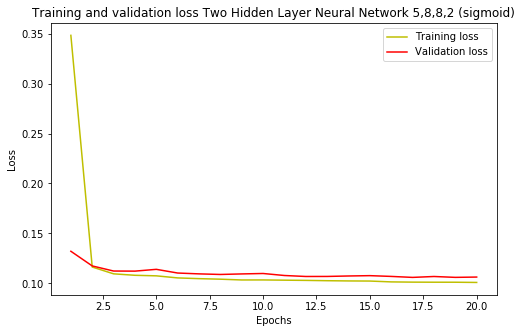

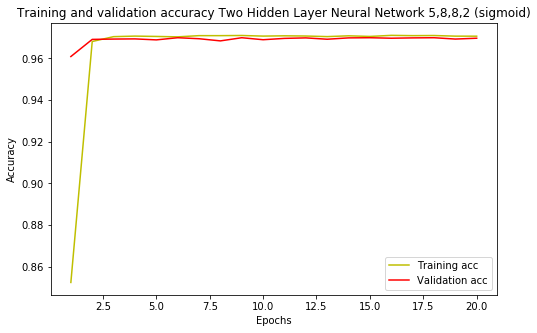

Two Hidden Layer Neural Network 5,8,8,2 (sigmoid)Accuracy Train: 97.07 %, Accuracy Test: 96.97 %
[0 1 0 ... 0 0 0]
[[13432   596]
 [  120 12670]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     14028
           1       0.96      0.99      0.97     12790

    accuracy                           0.97     26818
   macro avg       0.97      0.97      0.97     26818
weighted avg       0.97      0.97      0.97     26818



In [7]:
mlp_plot(get_date=1)

## **LAB SET UP**
Execute antes de iniciar o Lab.

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
warnings.filterwarnings("ignore")

from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, layers
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def plot_loss_acc(history,more_title=''):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(more_title + 'Accuracy Train: {:.2f} %, Accuracy Test: {:.2f} %'.format(acc[len(acc)-1] *100, val_acc[len(val_acc)-1]*100))

    return loss, val_loss, acc, val_acc

print('Set Up completed!')    

Set Up completed!
